In [1]:
import pandas as pd
data= pd.read_csv(
    "winequalityN.csv",
    names=["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])

threshold = 6  # Define your threshold

data['quality'] = (data['quality'] > threshold).astype(int)
data['type'] = data['type'].apply(lambda x: 0 if x=='white' else 1)
counts = data['quality'].value_counts()
target_count = min(counts)
balanced_data = pd.concat([
    data[data['quality'] == 0].sample(target_count, replace=True),
    data[data['quality'] == 1].sample(target_count, replace=True)
])
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data['quality'].value_counts()
data = balanced_data
features = data.copy()
features.fillna(0, inplace=True)
labels = features.pop('quality')
import numpy as np
features = np.array(features)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.05, random_state=0)

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
logmodel = GaussianNB()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions_train = logmodel.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.6640625


In [6]:
import sklearn
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[41, 29],
       [14, 44]], dtype=int64)

In [7]:
sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.656     , 0.67175573])

In [8]:
sklearn.metrics.roc_curve(y_test,predictions)

(array([0.        , 0.41428571, 1.        ]),
 array([0.        , 0.75862069, 1.        ]),
 array([inf,  1.,  0.]))

In [9]:
sklearn.metrics.roc_auc_score(y_test,predictions)

0.672167487684729

In [10]:
sklearn.metrics.log_loss(y_test,predictions)

12.108414810406543

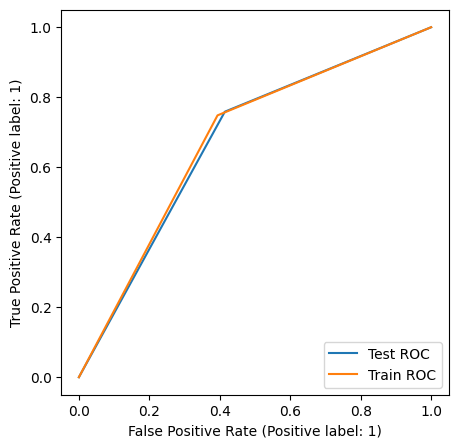

In [11]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,predictions, ax=ax, label='Test ROC')
RocCurveDisplay.from_predictions(y_train,predictions_train, ax=ax, label='Train ROC')

In [12]:
sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.656     , 0.67175573])